In [132]:
MAPE = function(ycap,y)
{
  cat('MAPE',mean(abs((y - ycap)/y)))
}
# Data importing
X=read.csv("dataset_Facebook.csv",sep=";",header=TRUE,na.string = '?' )
head(X)

Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


In [133]:
colnames(X)
dim(X) #whole data dimension

[1] "Page.total.likes"                                                   
 [2] "Type"                                                               
 [3] "Category"                                                           
 [4] "Post.Month"                                                         
 [5] "Post.Weekday"                                                       
 [6] "Post.Hour"                                                          
 [7] "Paid"                                                               
 [8] "Lifetime.Post.Total.Reach"                                          
 [9] "Lifetime.Post.Total.Impressions"                                    
[10] "Lifetime.Engaged.Users"                                             
[11] "Lifetime.Post.Consumers"                                            
[12] "Lifetime.Post.Consumptions"                                         
[13] "Lifetime.Post.Impressions.by.people.who.have.liked.your.Page"       
[14] "Lifetime.Post.reach.by.people.who.like.your.Page"                   
[15] "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"
[16] "comment"                                                            
[17] "like"                                                               
[18] "share"                                                              
[19] "Total.Interactions"

[1] 500  19

In [134]:
#shortening column names
colnames(X)[8:15]=c('Total.Reach','Total.Impressions','Lifetime.Engaged.Users','Consumers','Consumptions','Impressions.liked','Reach.liked','People.engaged.liked')
colnames(X)#checking column names after shortening

[1] "Page.total.likes"       "Type"                   "Category"              
 [4] "Post.Month"             "Post.Weekday"           "Post.Hour"             
 [7] "Paid"                   "Total.Reach"            "Total.Impressions"     
[10] "Lifetime.Engaged.Users" "Consumers"              "Consumptions"          
[13] "Impressions.liked"      "Reach.liked"            "People.engaged.liked"  
[16] "comment"                "like"                   "share"                 
[19] "Total.Interactions"

In [135]:
#from the information in the it is given that the column 'Total.Interactions' is sum of 'like', 'comment' and 'share'
#so, these four variables are redundant and we only use 'Total.Interaction' and exclude other 3
X=X[,-c(which(colnames(X)=='like'),which(colnames(X)=='share'),which(colnames(X)=='comment'))]
dim(X)

[1] 500  16

In [136]:
library(skimr)

In [137]:
skim(X)

-- Data Summary ------------------------
                           Values
Name                       X     
Number of rows             500   
Number of columns          16    
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  15    
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 1 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 Type                  0             1 FALSE          4
  top_counts                        
* <chr>                             
1 Pho: 426, Sta: 45, Lin: 22, Vid: 7

-- Variable type: numeric ------------------------------------------------------
# A tibble: 15 x 11
   skim_variable          n_missing complete_rate       mean        sd    p0
 * <chr>                      <int>         <dbl>      <db

In [138]:
#see that there is 500 obsn, 16 variables, one categorical, 15 numeric variable
#one missing value in 'Paid'

#We will exculde the single observation contains a missing value
which(is.na(X$Paid)==T) #500

[1] 500

In [139]:
#deleting 500th observation 
X=X[-500,]
dim(X)

[1] 499  16

In [140]:
#Actually there are 6 categorical variable namely 'Type', 'Category', 'Post.Month'
#'Post.Weekday', 'Post.Hour' and 'Paid' needed to convert into categorical type
X$Type=as.factor(X$Type)
X$Category=as.factor(X$Category)
X$Paid=as.factor(X$Paid)
X$Post.Month=as.factor(X$Post.Month)
X$Post.Hour=as.factor(X$Post.Hour)
X$Post.Weekday=as.factor(X$Post.Weekday)

In [141]:
#let's again see the variables and their summary
skim(X)
#now, no missing value 6 categorical , 10 numeric variable


-- Data Summary ------------------------
                           Values
Name                       X     
Number of rows             499   
Number of columns          16    
_______________________          
Column type frequency:           
  factor                   6     
  numeric                  10    
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 6 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 Type                  0             1 FALSE          4
2 Category              0             1 FALSE          3
3 Post.Month            0             1 FALSE         12
4 Post.Weekday          0             1 FALSE          7
5 Post.Hour             0             1 FALSE         22
6 Paid                  0             1 FALSE          2
  top_counts                        
* <chr>                   

In [142]:
#splitting into train and test
set.seed(197)
ind=sample(499,499*.8) # selecting randomly approx. 80% of observation from 499 observation
X_train=X[ind,]
X_test=X[-ind,]
dim(X_train)  #399 16
dim(X_test)   #100 16

#train set
y=X_train[,which(colnames(X)=='Lifetime.Engaged.Users')]
X=X_train[,-which(colnames(X)=='Lifetime.Engaged.Users')]

#test set
y_test=X_test[,which(colnames(X_test)=='Lifetime.Engaged.Users')]
X_test=X_test[,-which(colnames(X_test)=='Lifetime.Engaged.Users')]


dim(X)  #now dimension of X is 399 x 15

[1] 399  16

[1] 100  16

[1] 399  15

In [143]:

cat_col=c(2,3,4,5,6,7) # a Variable containing the column indices of categorical variable

cat_col#box plot and frequency tables for categorical variable
data=cbind.data.frame(y,X)
colnames(data)[1]="Lifetime.Engaged.Users"


[1] 2 3 4 5 6 7

In [144]:
library(ggplot2)
library(RColorBrewer)


  Link  Photo Status  Video 
    19    345     32      3 

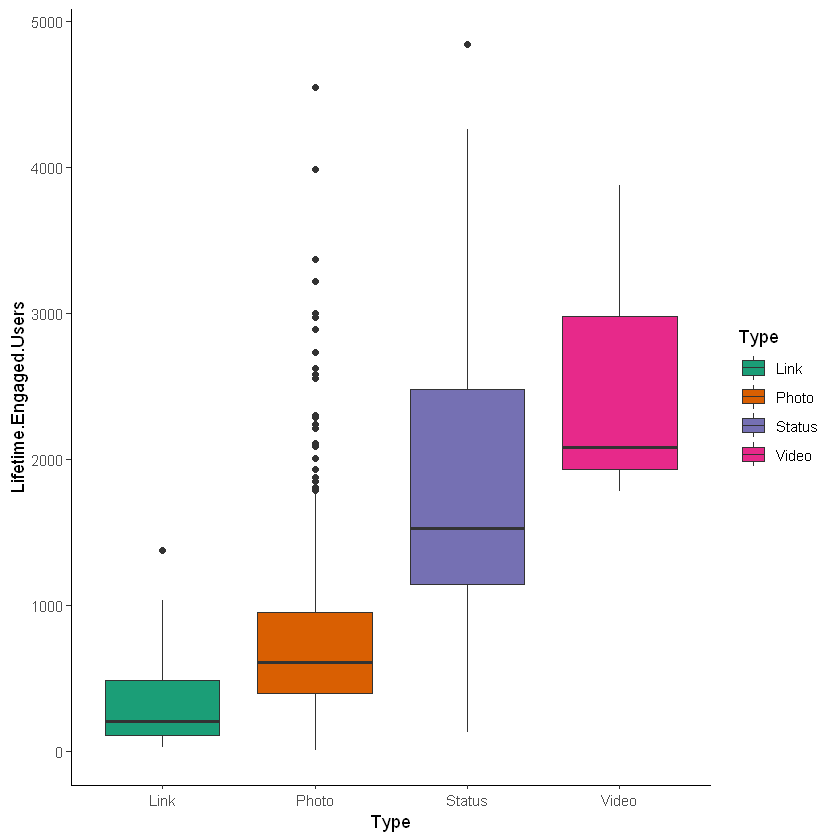

In [145]:
#Handling Type Variable 
ggplot(data,aes(x=Type,y=Lifetime.Engaged.Users,fill=Type))+
  geom_boxplot()+scale_fill_brewer(palette = "Dark2")+theme_classic()
table(X[,2])
#'Photo' consists many outliers. 'Status', 'Link', 'Video' have long tail
#clearly we see a ordering i.e. y increases from Link to Photo to Status to Video
#so, we can assign a increasing number to these labels of category
X[,2]=factor(X[,2],levels = c('Link','Photo','Status','Video'),labels = c(1,2,3,4))
X[,2]=as.numeric(X[,2])


  1   2   3 
174 101 124 

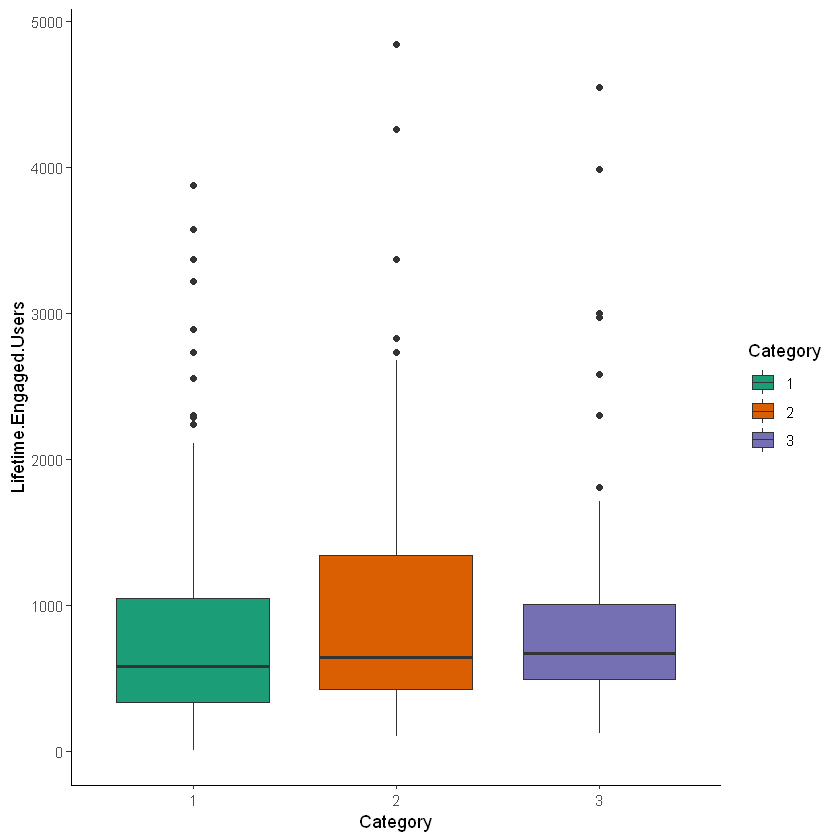

In [146]:


ggplot(data,aes(x=Category,y=Lifetime.Engaged.Users,fill=Category))+
  geom_boxplot()+scale_fill_brewer(palette = "Dark2")+theme_classic()
table(X[,3])
#each label has outliers, category 1,2,3 contain 174,101,124 respectively
#category 2 has long tail. all levels have almost same central tendency



  0   1 
301  98 

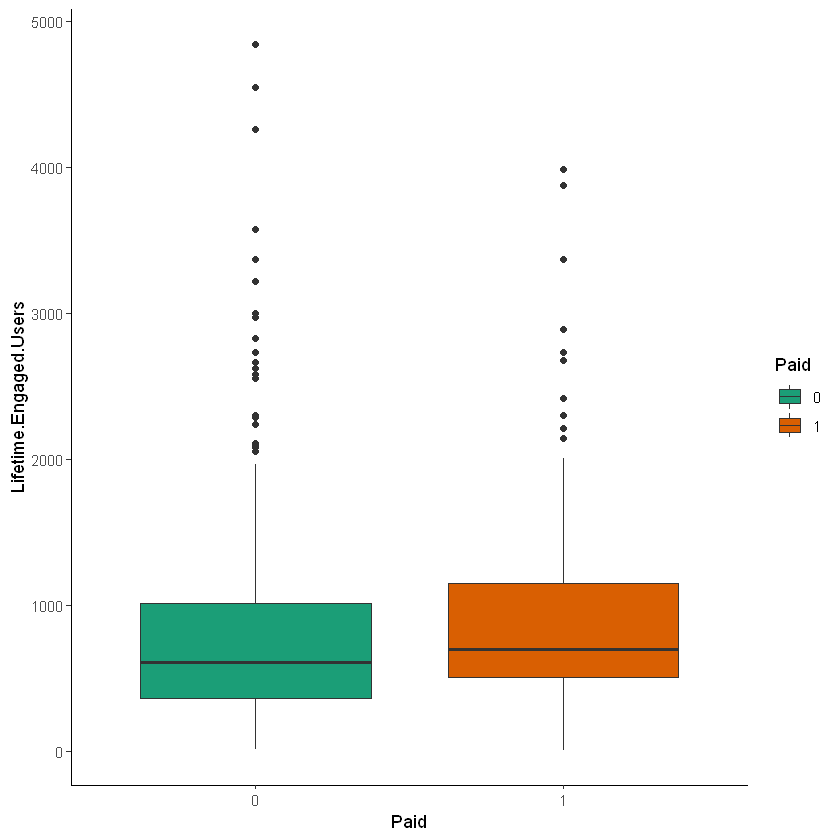

In [147]:

ggplot(data,aes(x=Paid,y=Lifetime.Engaged.Users,fill=Paid))+
  geom_boxplot()+scale_fill_brewer(palette = "Dark2")+theme_classic()
table(X[,7])
#each label has many outliers , paid 0 is more frequent (301)



 1  2  3  4  5  6  7  8  9 10 11 12 
21 24 29 37 29 40 38 26 32 50 33 40 

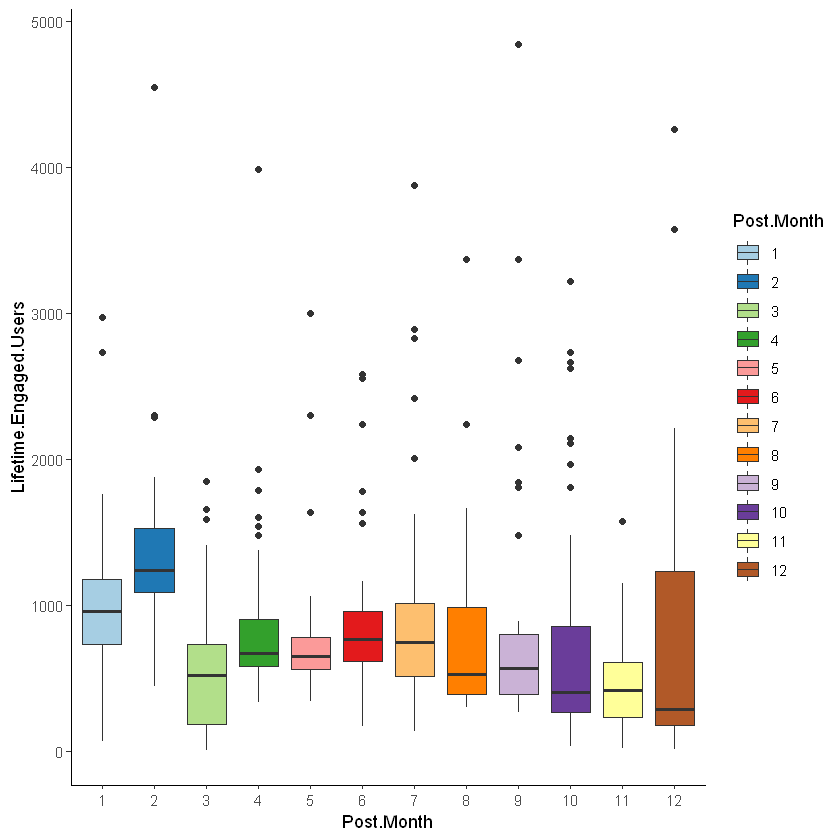

In [148]:
ggplot(data,aes(x=Post.Month,y=Lifetime.Engaged.Users,fill=Post.Month))+
  geom_boxplot()+scale_fill_brewer(palette = "Paired")+theme_classic()
table(X[,4])
#most frequent months are oct(50), dec(40)
#seeing the graph we can group our months into three groups considering their central tendency
#(1,2),(3,4,5,6,,7),(8,9,10,11,12)
library(plyr)
X[,4]=revalue(X[,4],c('1'='group1','2'='group1','3'='group2','4'='group2','5'='group2','6'='group2','7'='group2','8'='group3','9'='group3','10'='group3','11'='group3','12'='group3'))



 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 
 4 30 85 29 11 14  9  9 25 63 34 21 40 11  4  1  3  3  1  1  1  0 

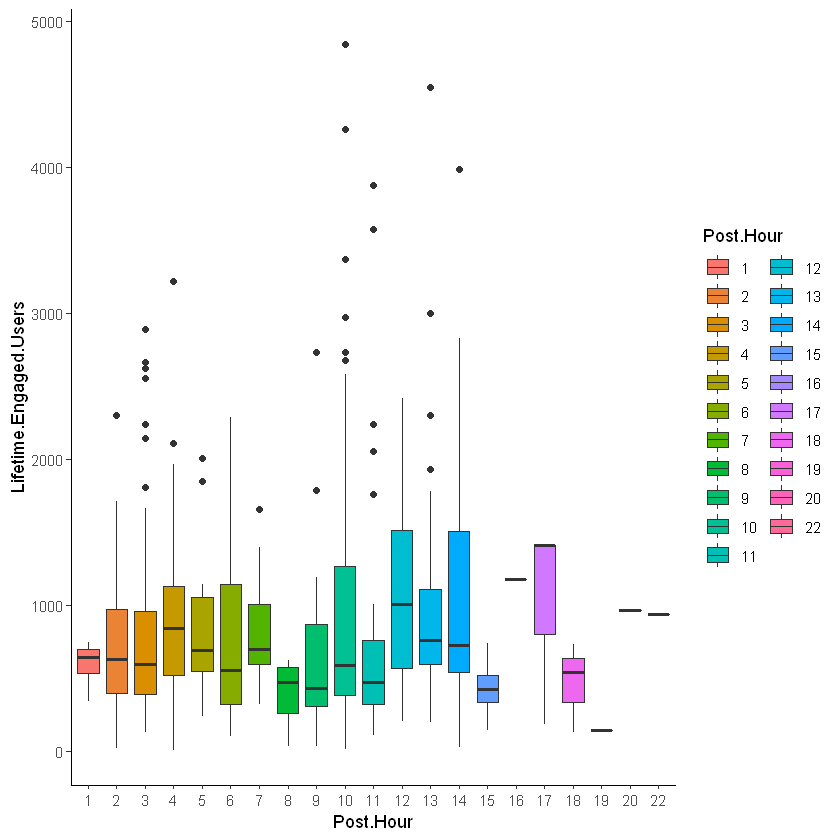

In [149]:
ggplot(data,aes(x=Post.Hour,y=Lifetime.Engaged.Users,fill=Post.Hour))+
  geom_boxplot()+theme_classic()
table(X[,6])
#it is clear that there are only one observation in hour 16,19,20,22,hour 23 has no value
#seeing the plot we can group the hours in evening(15-22),night(23-4),morning(5-9),day(10-14)
X[,6]=revalue(X[,6],c('23'='night','1'='night','2'='night','3'='night','4'='night','5'='morning','6'='morning','7'='morning','8'='morning','9'='morning','10'='day','11'='day','12'='day','13'='day','14'='day','15'='evening','16'='evening','17'='evening','18'='evening','19'='evening','20'='evening','22'='evening'))




 1  2  3  4  5  6  7 
58 53 49 56 52 68 63 

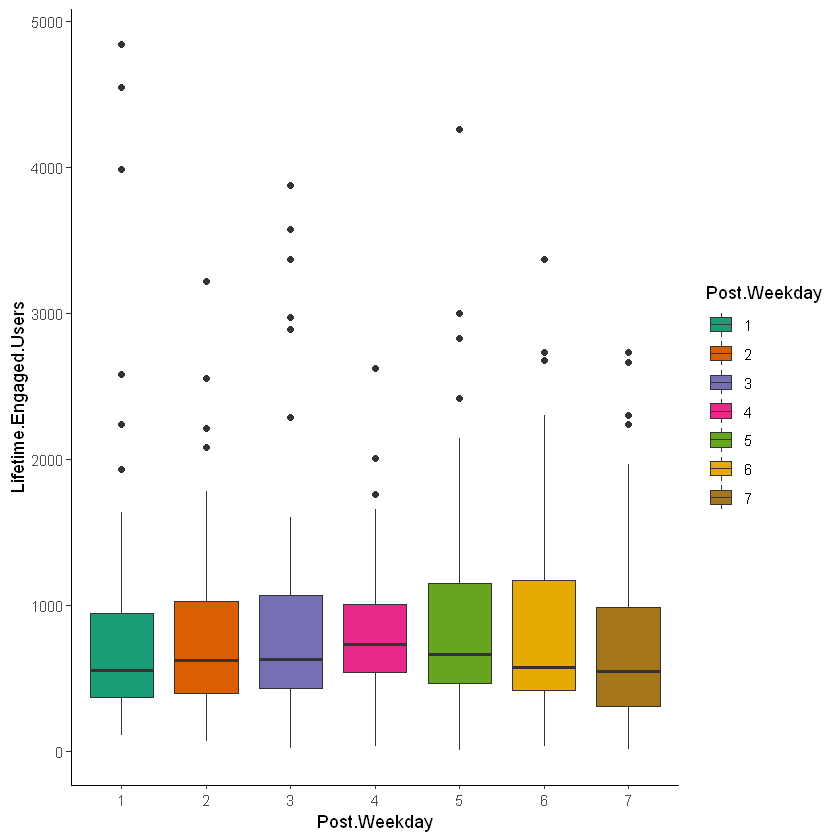

In [150]:

ggplot(data,aes(x=Post.Weekday,y=Lifetime.Engaged.Users,fill=Post.Weekday))+
  geom_boxplot()+scale_fill_brewer(palette = "Dark2")+theme_classic()
table(X[,5])
#all the observations are almost equally distributed among the levels, their central tendency also near about same but among them day 4 has highest central tendency
# here we can group these into weekday and weekened
X[,5]=revalue(X[,5],c('1'='weekday','2'='weekday','3'='weekday','4'='weekday','5'='weekday','6'='weekend','7'='weekend'))


,Page.total.likes,Type,Total.Reach,Total.Impressions,Consumers,Consumptions,Impressions.liked,Reach.liked,People.engaged.liked,Total.Interactions
Page.total.likes,1.00000000,0.19588706,-0.07898343,-0.10082818,-0.1810288,-0.1309026,-0.10701146,-0.08373285,0.01319878,0.02616364
Type,0.19588706,1.00000000,0.04969194,0.02943978,0.4884293,0.2350372,0.03292222,0.14945310,0.51282596,0.05934420
Total.Reach,-0.07898343,0.04969194,1.00000000,0.65387062,0.4654033,0.2620303,0.31776237,0.73681831,0.38987190,0.48429775
Total.Impressions,-0.10082818,0.02943978,0.65387062,1.00000000,0.3335410,0.2032278,0.87493643,0.64684875,0.32973666,0.32763053
Consumers,-0.18102875,0.48842927,0.46540329,0.33354095,1.0000000,0.5895780,0.28045424,0.59501859,0.91507175,0.41823366
Consumptions,-0.13090257,0.23503724,0.26203031,0.20322781,0.5895780,1.0000000,0.17131101,0.34541205,0.53381412,0.22896113
Impressions.liked,-0.10701146,0.03292222,0.31776237,0.87493643,0.2804542,0.1713110,1.00000000,0.59772542,0.33418363,0.29146004
Reach.liked,-0.08373285,0.14945310,0.73681831,0.64684875,0.5950186,0.3454121,0.59772542,1.00000000,0.66565469,0.64449764
People.engaged.liked,0.01319878,0.51282596,0.38987190,0.32973666,0.9150718,0.5338141,0.33418363,0.66565469,1.00000000,0.52950544
Total.Interactions,0.02616364,0.05934420,0.48429775,0.32763053,0.4182337,0.2289611,0.29146004,0.64449764,0.52950544,1.00000000


Page.total.likes,-0.1404654
Type,0.4348998
Total.Reach,0.5419739
Total.Impressions,0.3746976
Consumers,0.9695748
Consumptions,0.5618013
Impressions.liked,0.3151980
Reach.liked,0.6906750
People.engaged.liked,0.9288043
Total.Interactions,0.6205491


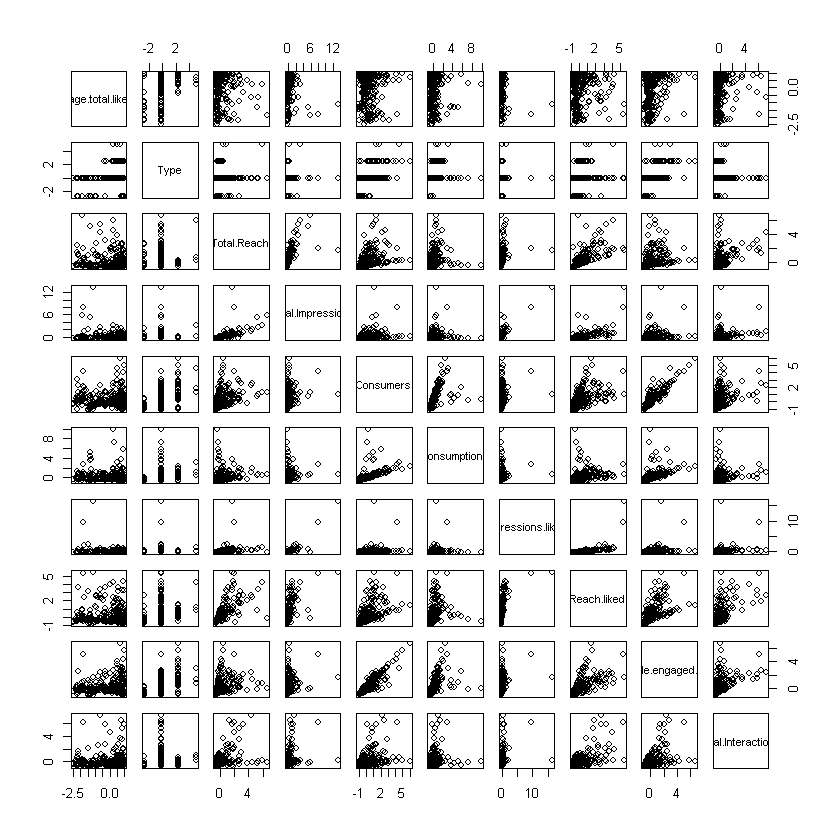

In [151]:

#now our categorical column has decreased
cat_col=c(3,4,5,6,7)
#Normalization
X[,-cat_col]=scale(X[,-cat_col])
#correlation among numeric variables
pairs(X[,-cat_col])
cor(X[,-cat_col])
cor(X[,-cat_col],y)


In [152]:
library(fastDummies)

In [153]:

# indicator Variable
library(fastDummies)
length(cat_col) #5
X=dummy_cols(X,select_columns =colnames(X)[ cat_col],remove_first_dummy = T,remove_selected_columns = T)
dim(X)  #399 x 19

[1] 5

[1] 399  19

In [154]:
# a function for modification in test set which include categorical variable modification, normalization, indicator variable
convert=function(X){
  X[,2]=factor(X[,2],levels = c('Link','Photo','Status','Video'),labels = c(1,2,3,4))
  X[,2]=as.numeric(X[,2])
  X[,4]=revalue(X[,4],c('1'='group1','2'='group1','3'='group2','4'='group2','5'='group2','6'='group2','7'='group2','8'='group3','9'='group3','10'='group3','11'='group3','12'='group3'))
  X[,6]=revalue(X[,6],c('23'='night','1'='night','2'='night','3'='night','4'='night','5'='morning','6'='morning','7'='morning','8'='morning','9'='morning','10'='day','11'='day','12'='day','13'='day','14'='day','15'='evening','16'='evening','17'='evening','18'='evening','19'='evening','20'='evening','22'='evening'))
  X[,5]=revalue(X[,5],c('1'='weekday','2'='weekday','3'='weekday','4'='weekday','5'='weekday','6'='weekend','7'='weekend'))
  cat_col=c(3,4,5,6,7)
  X[,-cat_col]=scale(X[,-cat_col])
  X=dummy_cols(X,select_columns =colnames(X)[ cat_col],remove_first_dummy = T,remove_selected_columns = T)
  
  return(X)
}
X_test=convert(X_test)

In [155]:
p=(dim(X))[2]   
p     #no. of predictors   19
n=(dim(X))[1]
n     #no. of observation  399
dim(X_test)

[1] 19

[1] 399

[1] 100  19

In [156]:
install.packages("olsrr")

Warning message:
"package 'olsrr' is in use and will not be installed"

In [157]:
library(olsrr)
my_data=cbind(y,X)
model=lm(y~.,data=my_data)
summary(model)      # multiple R squared=.9971,  Adjusted R square=0.9969
dim(my_data)  #399  19
predictions <- predict(model, X_test)
MAPE(predictions,y_test)  #MAPE 0.3498  


Call:
lm(formula = y ~ ., data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-316.49  -14.60    1.52   14.07  233.63 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          873.5529    14.7260  59.321  < 2e-16 ***
Page.total.likes       4.0530     5.3029   0.764   0.4452    
Type                  -2.3758     2.8198  -0.843   0.4000    
Total.Reach           58.9381     8.6817   6.789 4.38e-11 ***
Total.Impressions    -57.6205    11.0707  -5.205 3.19e-07 ***
Consumers            605.6521     8.7876  68.922  < 2e-16 ***
Consumptions          -5.1427     2.7782  -1.851   0.0649 .  
Impressions.liked     41.2835    10.1558   4.065 5.84e-05 ***
Reach.liked          -14.5050     7.0468  -2.058   0.0402 *  
People.engaged.liked  47.6695     9.2135   5.174 3.72e-07 ***
Total.Interactions   178.2323     3.2223  55.312  < 2e-16 ***
Category_2             0.8342     6.1741   0.135   0.8926    
Category_3             1.9166     5.7475  

[1] 399  20

MAPE 0.3498235

[1] 5


Call:
lm(formula = y ~ ., data = my_data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.15  -13.59    2.83   14.66  215.62 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          887.2886    14.5272  61.078  < 2e-16 ***
Page.total.likes       8.3576     5.1629   1.619  0.10634    
Type                  -3.2578     2.7032  -1.205  0.22890    
Total.Reach           68.6141     9.4654   7.249 2.43e-12 ***
Total.Impressions    -89.5268    16.6509  -5.377 1.34e-07 ***
Consumers            602.7834     8.6434  69.740  < 2e-16 ***
Consumptions          -6.4668     3.4036  -1.900  0.05820 .  
Impressions.liked     77.7228    23.9431   3.246  0.00128 ** 
Reach.liked          -22.2853     9.3869  -2.374  0.01810 *  
People.engaged.liked  53.6517     9.0813   5.908 7.80e-09 ***
Total.Interactions   181.3531     3.1814  57.003  < 2e-16 ***
Category_2            -2.0362     5.9315  -0.343  0.73157    
Category_3             0.9582     5.5281 

[1] 394  20

MAPE 0.336696

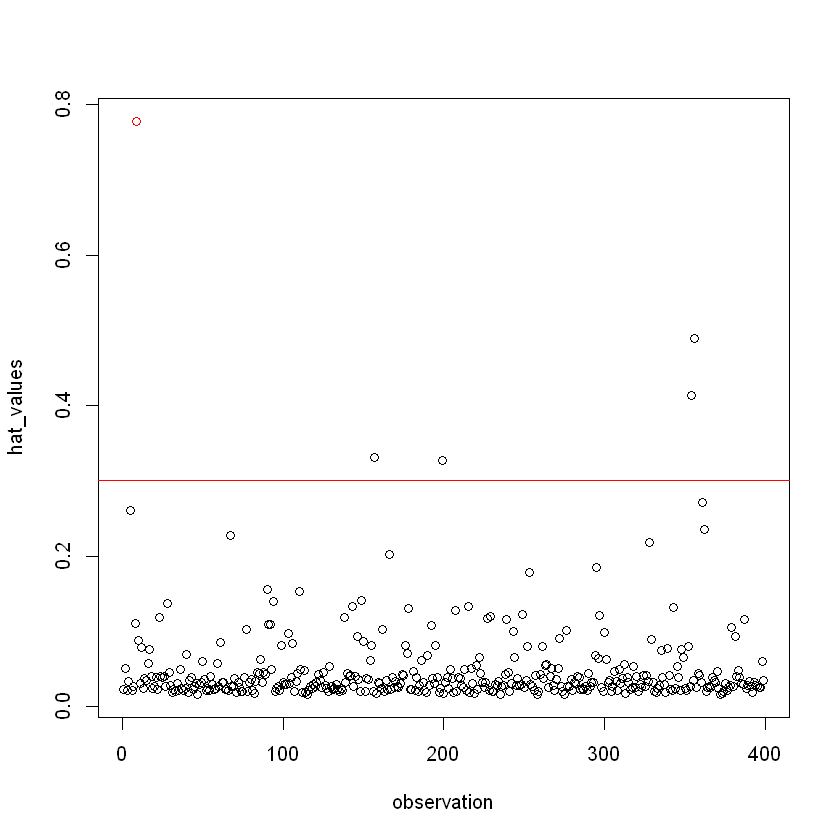

In [158]:

#leverage points
hat_value=hatvalues(model)
par(mfrow=c(1,1))
plot(hat_value,xlab ="observation",ylab="hat_values",col=(hat_value>0.6)+1)
abline(h=0.3,col="red")
lev_point=which(hat_value>0.3)      # it provides row no of data corresponding to which high hat values
length(lev_point)  # 5
my_data1=my_data[-lev_point,]
#c=which(colSums(my_data1)==0)
#c
#my_data1=my_data1[,-c]
#X.test=X_test[,-(c-1)]
row.names(my_data1)=as.character(seq(1,dim(my_data1)[1]))   # assigning row names to each row of data
model1=lm(y~.,my_data1)
summary(model1)
dim(my_data1)
predictions <- predict(model1, X_test)
MAPE(predictions,y_test) ##MAPE 0.3366

[1] 3

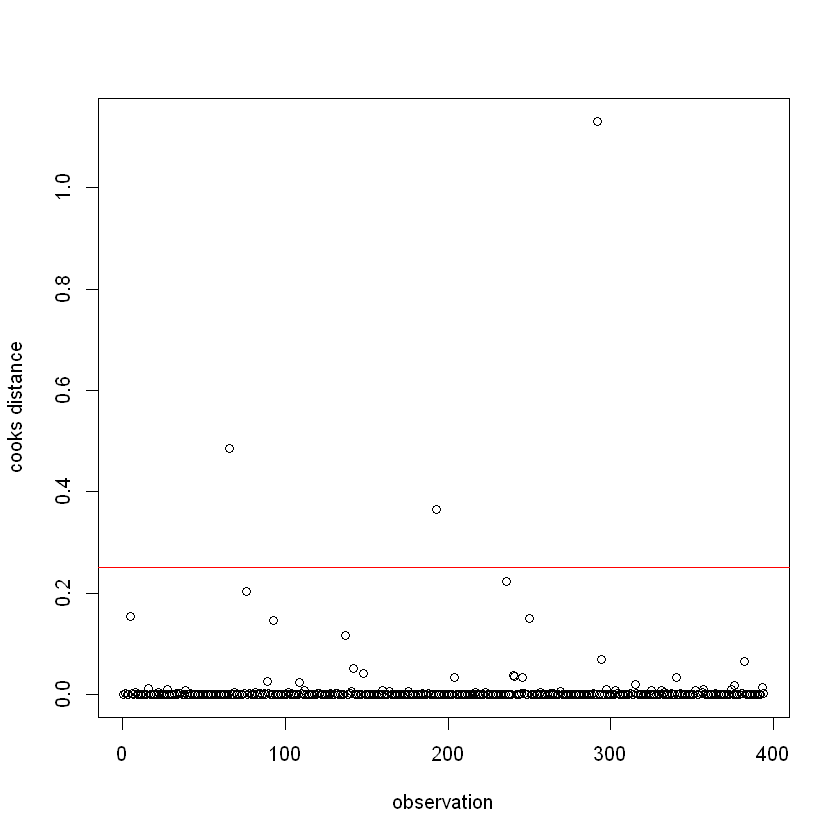

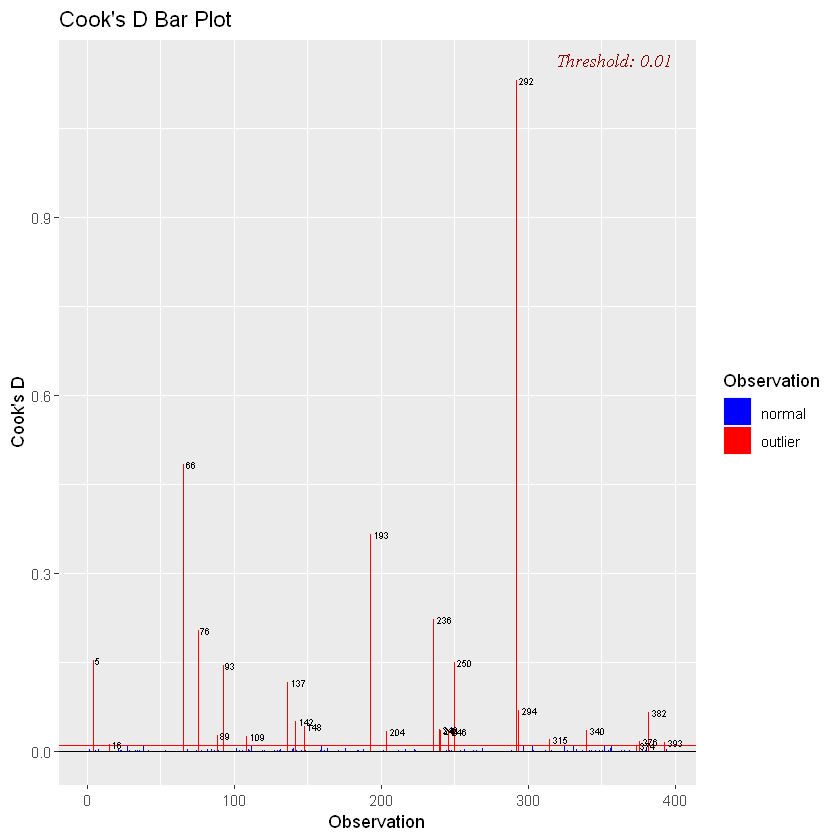

In [159]:


# cooks distance
cd=cooks.distance(model1)
plot(cd,xlab="observation",ylab="cooks distance")
abline(h=0.25,col="red")
inf_cd=which(cd>0.25)
length(inf_cd) #3
ols_plot_cooksd_bar(model1)

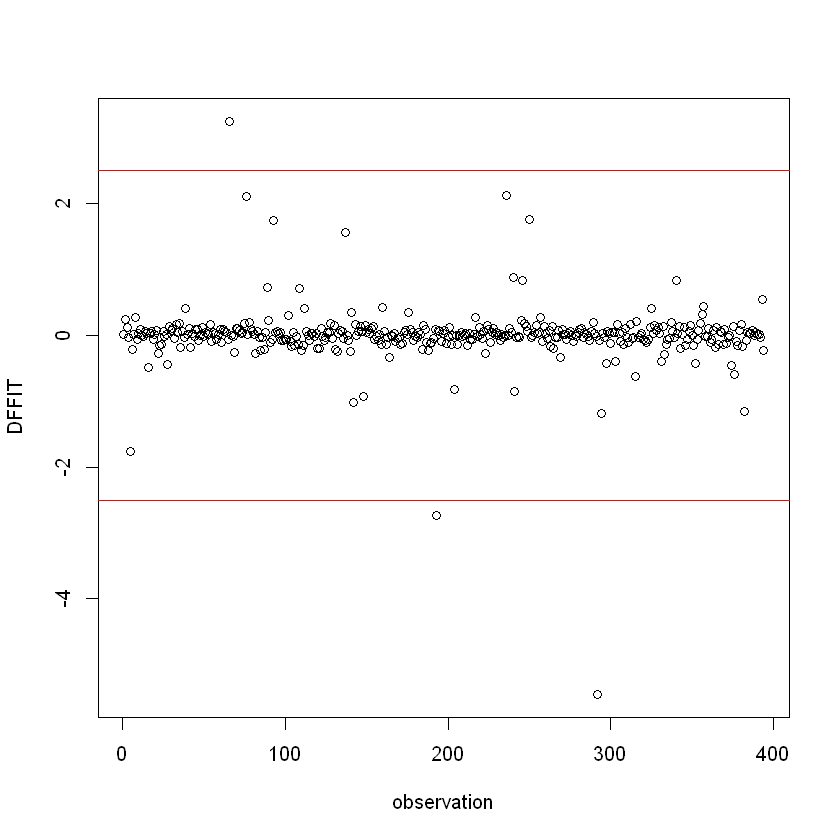

[1] 3

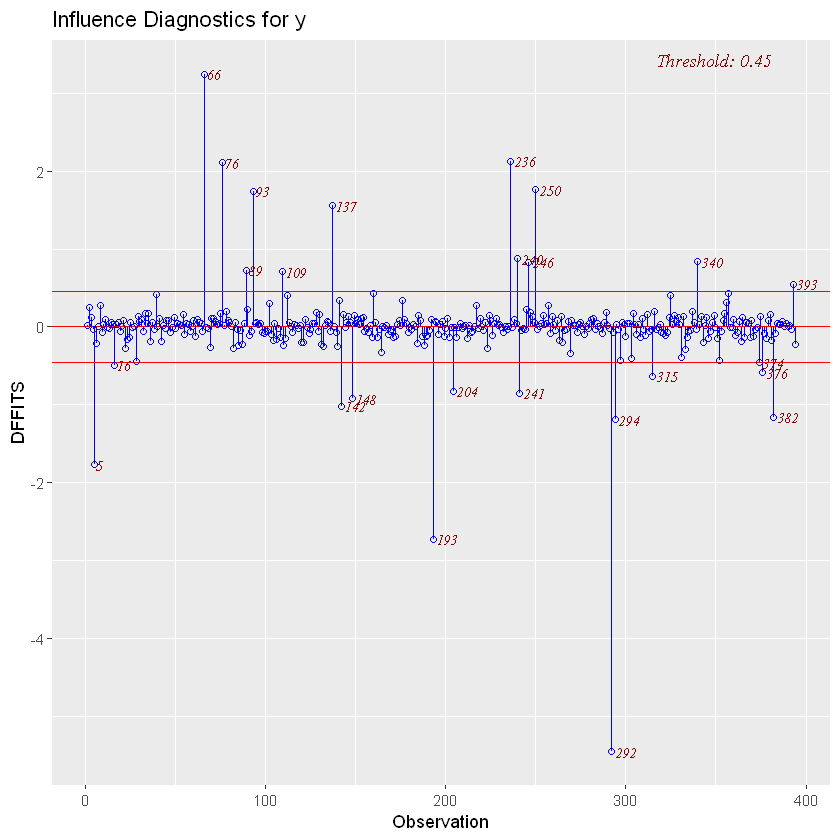

In [160]:

# DFFITS
df_fit=dffits(model1)
plot(1:length(df_fit),df_fit,xlab="observation",ylab="DFFIT")
abline(h=c(2.5,-2.5),col="red")
ols_plot_dffits(model1)
influence_DFFIT=which(abs(df_fit)>2.5)
length(influence_DFFIT)  #3

In [161]:



####DFBETA######
DFBETA_ij=dfbetas(model1)
dim(my_data1)  #394 20
influence_DFBETA=c()
for(j in 2:10)
  influence_DFBETA=c(influence_DFBETA ,which(abs(DFBETA_ij[,j])>2/sqrt(394)) )
influence_DFBETA = as.numeric(names(which( table(influence_DFBETA)>=7) ) )
length(influence_DFBETA) #10

[1] 394  20

[1] 10

[1] 6

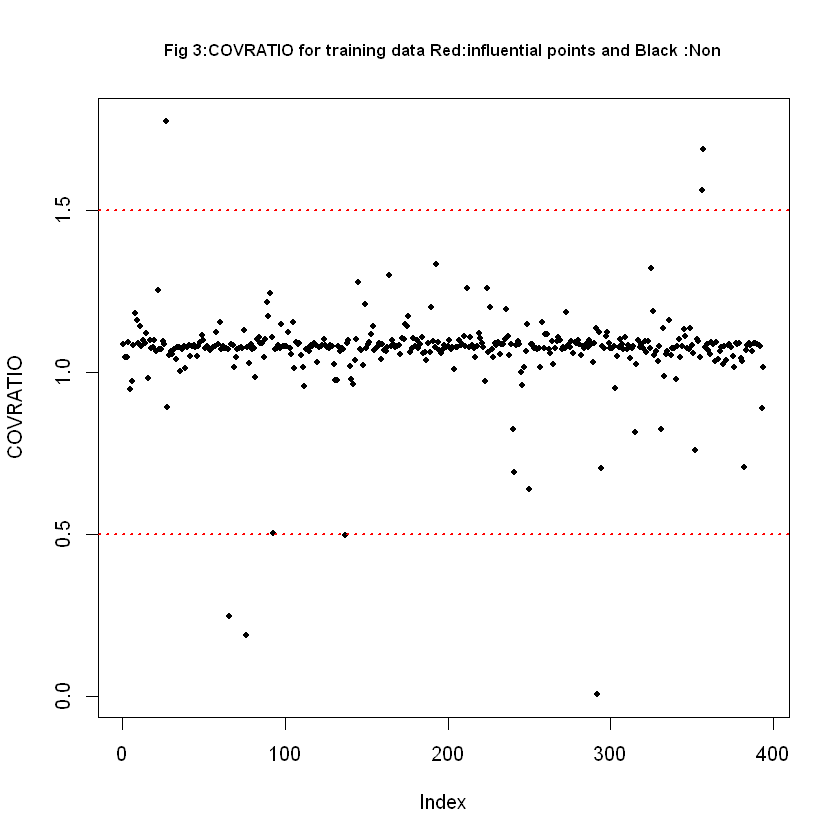

In [162]:


#covratio
COVRATIO=covratio(model1)
par(mfrow=c(1,1))
plot(COVRATIO,main="Fig 3:COVRATIO for training data Red:influential points and Black :Non",
     col=(abs(COVRATIO-1)>1)+1,cex.main=0.85, pch=20)
abline(h=c( 1.5, 0.5) , col="red", lwd=2, lty="dotted")#check threshold
influence_COVRATIO1=which(abs(COVRATIO)>1.5)
influence_COVRATIO2=which(abs(COVRATIO)<0.4)
influence_COVRATIO=length(influence_COVRATIO1)+length(influence_COVRATIO2) # 6
influence_COVRATIO


In [163]:

#####Final Influential#####
influential = sort(( c(inf_cd,influence_DFBETA,influence_DFFIT,influence_COVRATIO ) ))
final=as.numeric(names(which(table(influential)>=2)))
length(final)  #3
my_data2=my_data1[-final,]
which(colSums(my_data2)==0) #0
#row.names(my_data2)=as.character(seq(1,dim(my_data2)[1]))
dim(my_data2)  #391  20

[1] 3

named integer(0)

[1] 391  20

In [164]:


model2=lm(y~.,data=my_data2)
summary(model2)
predictions <- predict(model2, X_test)
MAPE(predictions,y_test) # MAPE 0.3260  
my_data22=my_data2



Call:
lm(formula = y ~ ., data = my_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-146.850  -14.496    3.641   15.071  194.887 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           887.450     12.198  72.756  < 2e-16 ***
Page.total.likes        7.490      4.388   1.707  0.08867 .  
Type                   -4.490      2.268  -1.980  0.04846 *  
Total.Reach            54.302      8.187   6.632 1.17e-10 ***
Total.Impressions     -79.080     14.318  -5.523 6.27e-08 ***
Consumers             613.459      7.325  83.751  < 2e-16 ***
Consumptions           -7.498      2.853  -2.628  0.00894 ** 
Impressions.liked     103.977     24.459   4.251 2.70e-05 ***
Reach.liked           -27.361      8.882  -3.080  0.00222 ** 
People.engaged.liked   45.941      7.700   5.967 5.65e-09 ***
Total.Interactions    190.558      3.159  60.322  < 2e-16 ***
Category_2             -7.976      5.016  -1.590  0.11263    
Category_3             -5.887  

MAPE 0.326058

In [165]:
library(ggpubr)

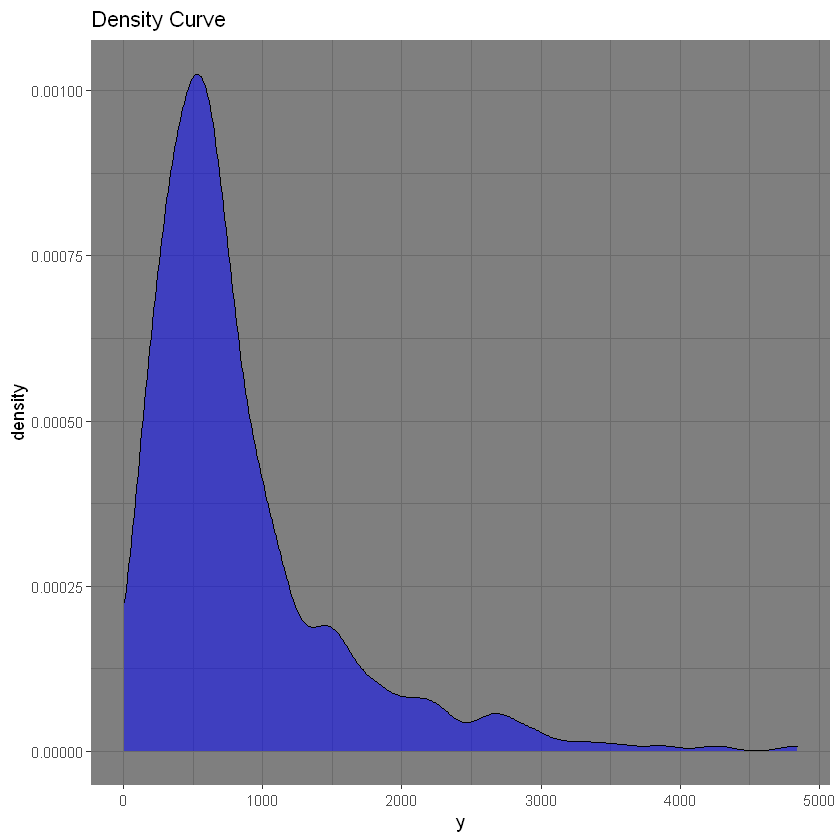

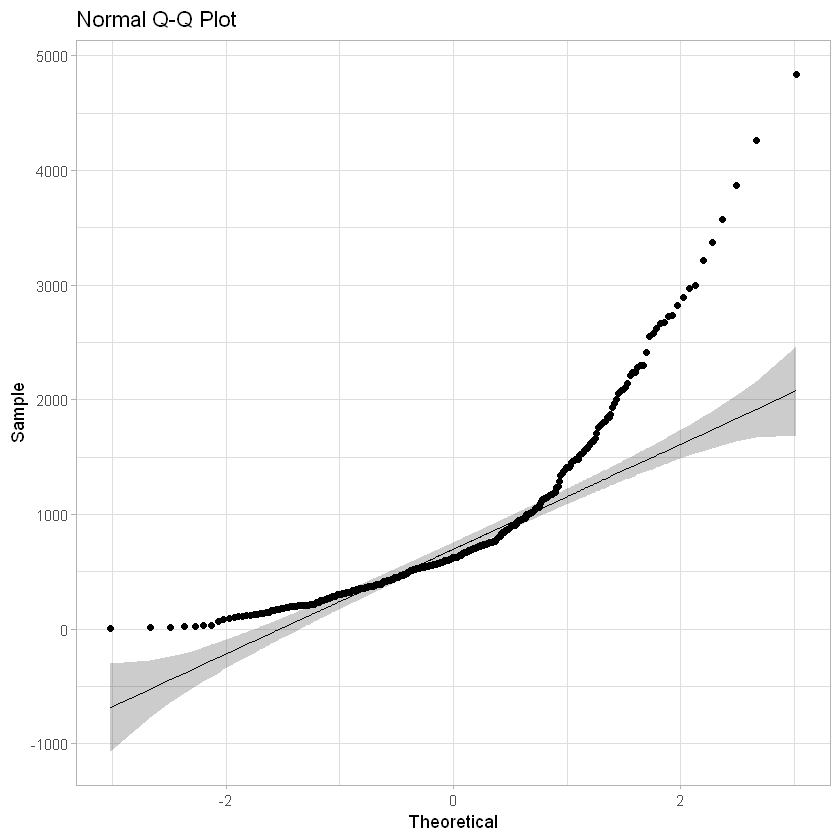

In [166]:

##normality checking
y=my_data2[,1]

ggdensity(y,fill='blue')+ggtitle('Density Curve')+labs(x='y')+theme_dark()
ggqqplot(y)+ggtitle('Normal Q-Q Plot')+theme_light()

In [167]:
library(MASS)

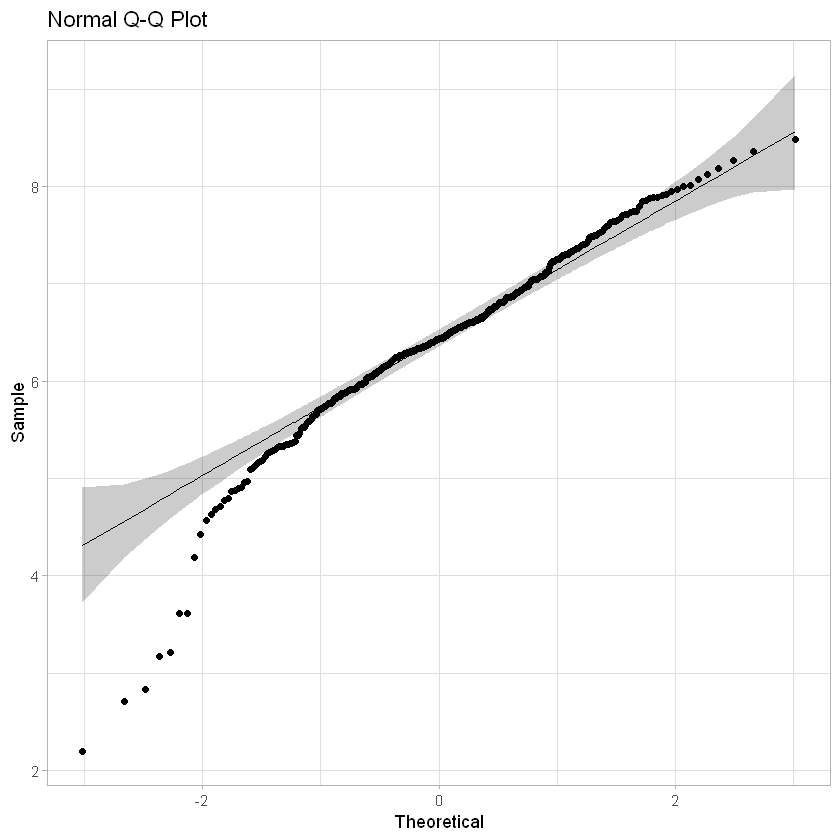

[1] 2


	Shapiro-Wilk normality test

data:  z^best.lambda
W = 0.98679, p-value = 0.001265


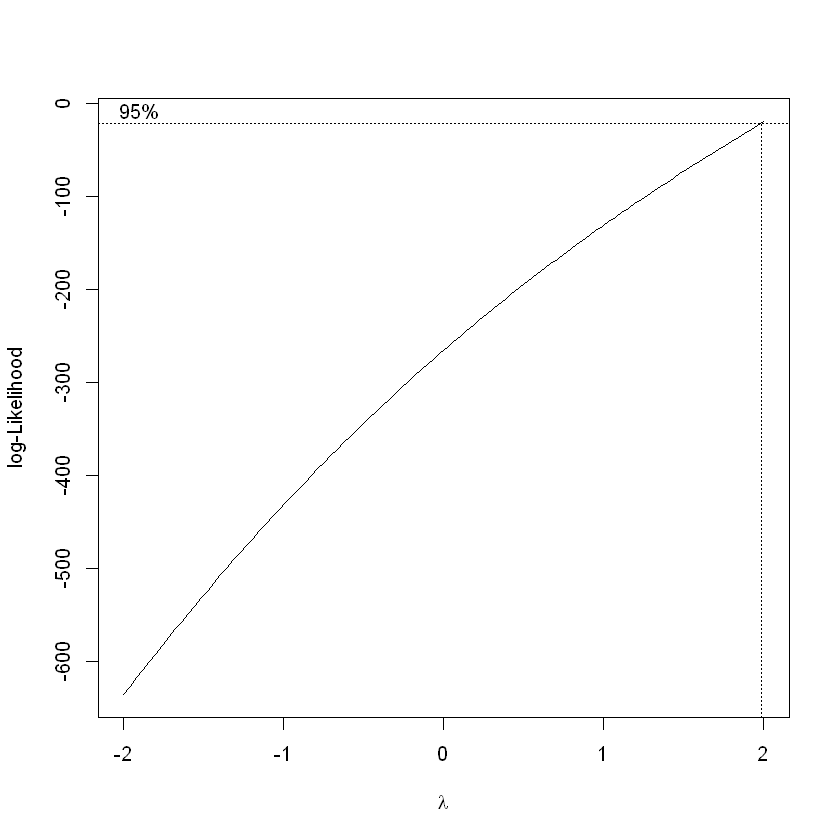

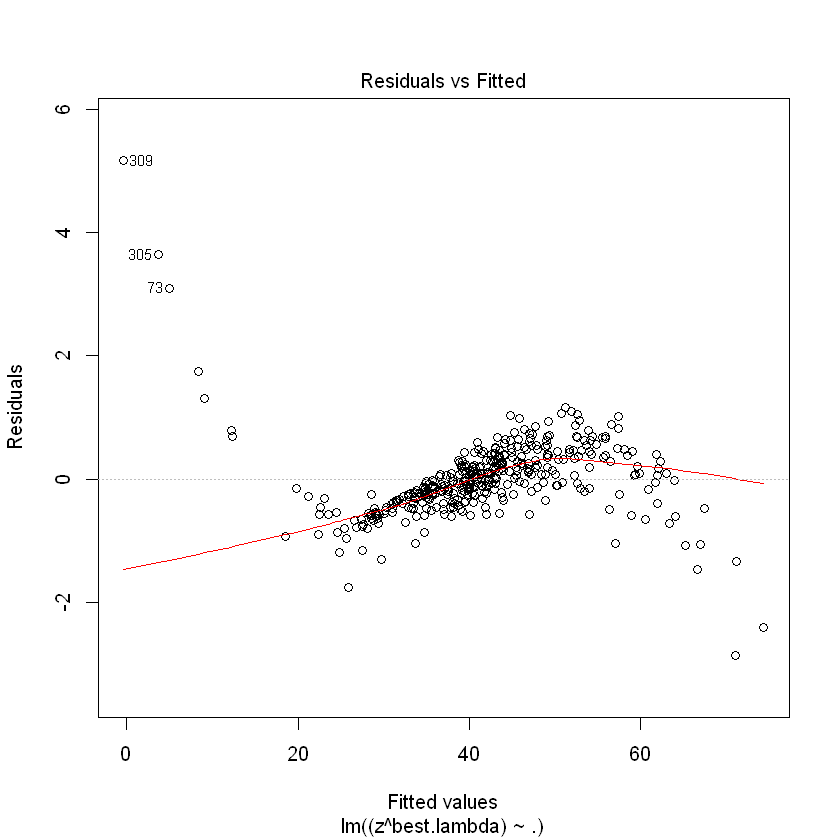

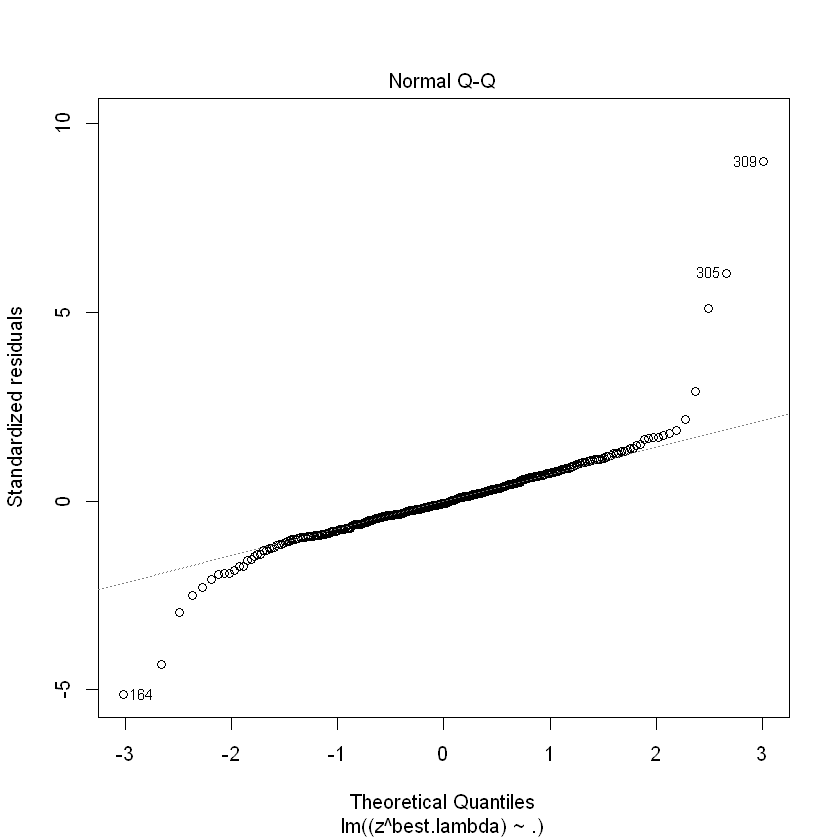

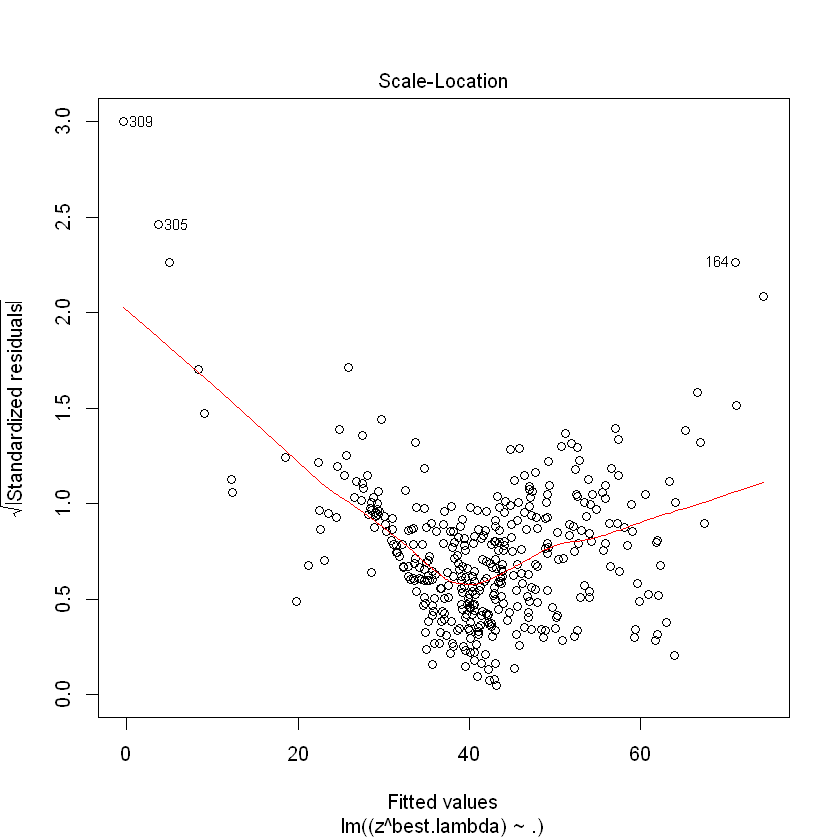

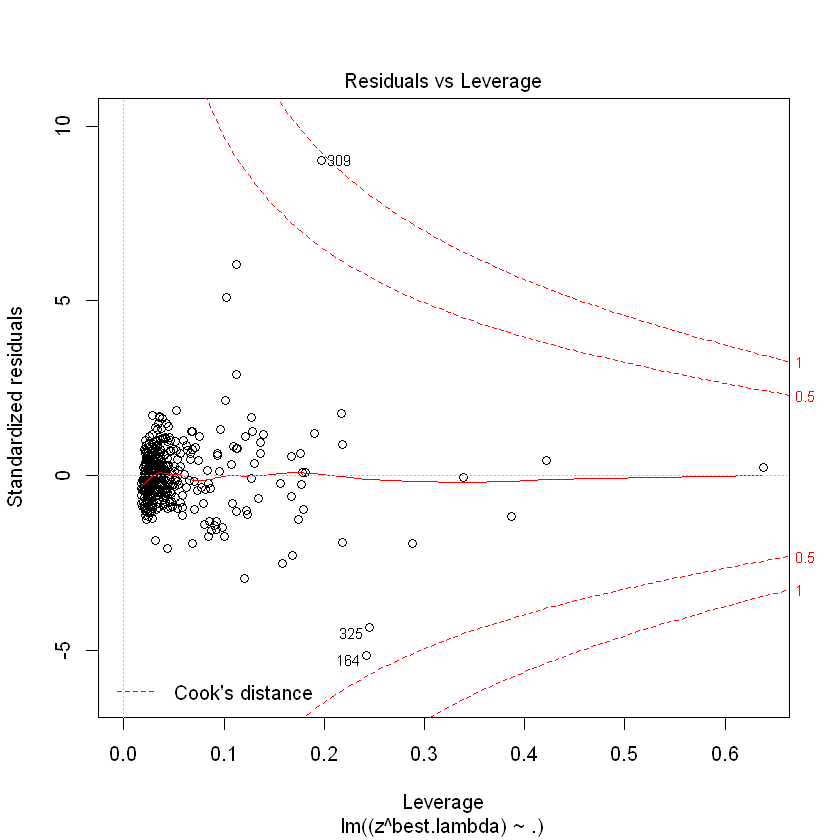

In [168]:
# Box-Cox transformation
z=log(y)
ggqqplot(z)+ggtitle('Normal Q-Q Plot')+theme_light()
# box cox transformation on log(y)
my_data22[,1]=z
mod_bc=lm(y~.,data=my_data22)   # model for box-cox transformation
bc=boxcox(mod_bc,lambda = seq(-2,2))   # boc-cox transformation 
best.lambda= bc$x[which(bc$y==max(bc$y))]
best.lambda  #2
shapiro.test(z^best.lambda)    #0.001265
plot(lm((z^best.lambda)~.,data=my_data22))


Warning message:
"Removed 1 rows containing non-finite values (stat_qq)."Warning message:
"Removed 1 rows containing non-finite values (stat_qq_line)."Warning message:
"Removed 1 rows containing non-finite values (stat_qq_line)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

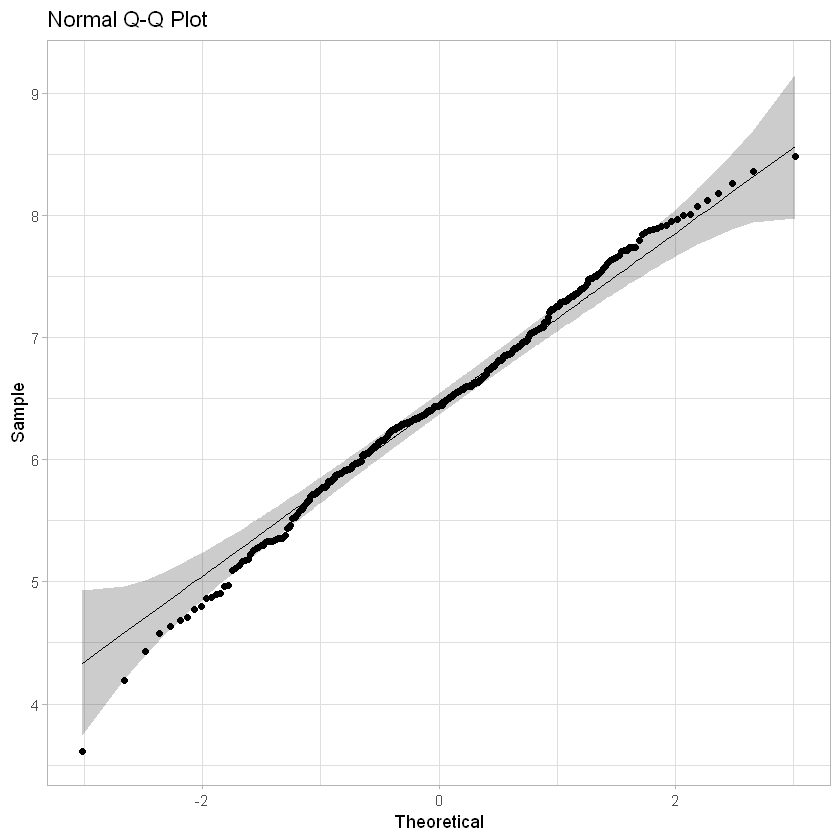


	Shapiro-Wilk normality test

data:  z1
W = 0.99375, p-value = 0.1135


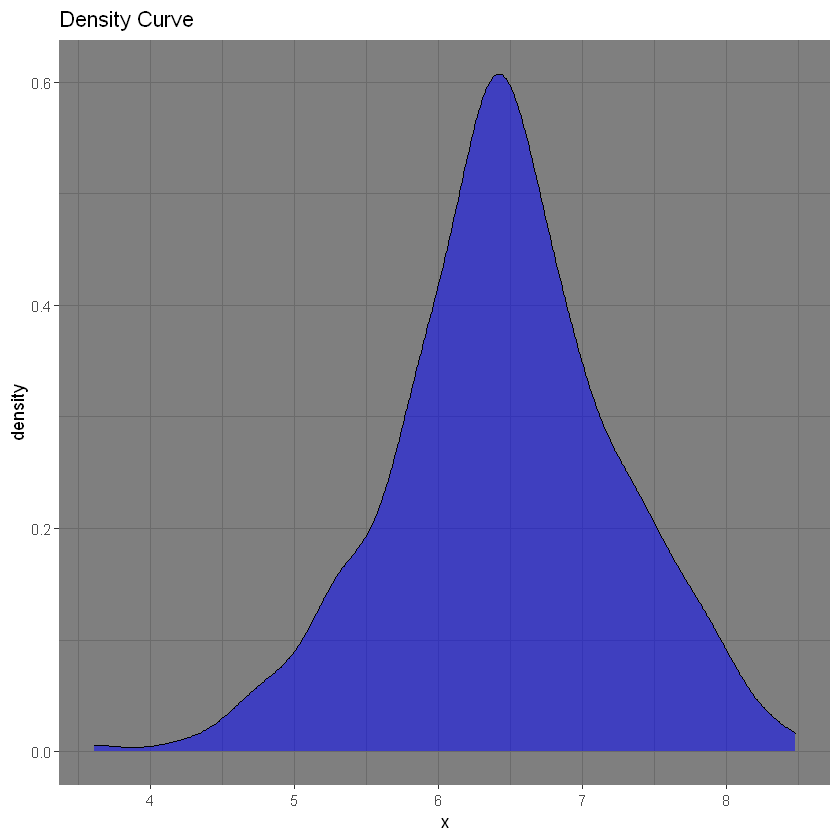

In [169]:
#excluding first 6 points
z1=sort(z)[7:392]
ggqqplot(z1)+ggtitle('Normal Q-Q Plot')+theme_light()
ggdensity(z1,fill='blue')+ggtitle('Density Curve')+theme_dark()
shapiro.test(z1) #p-value = 0.1135  so, it is normal
del_point=which(z<=sort(z)[6])


In [170]:

#new data with transformed response
my_data2[,1]=z
my_data2=my_data2[-del_point,]
colnames(my_data2)[1]='z'
dim(my_data2)   #384  20
model3=lm(z~.,data=my_data2)   #Our new or transformed model
summary(model3)
predictions <- predict(model3, X_test)
#MAPE(exp(predictions),y_test) # MAPE 0.4811202
MAPE(predictions,log(y_test))   # 0.06632

[1] 384  20


Call:
lm(formula = z ~ ., data = my_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58114 -0.09024  0.05563  0.17159  0.57939 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.64417    0.11310  58.744  < 2e-16 ***
Page.total.likes     -0.03206    0.04140  -0.774  0.43916    
Type                  0.08685    0.02109   4.119 4.71e-05 ***
Total.Reach          -0.11060    0.07522  -1.470  0.14235    
Total.Impressions     0.35353    0.13157   2.687  0.00754 ** 
Consumers             0.51335    0.06738   7.618 2.25e-13 ***
Consumptions          0.07069    0.02622   2.696  0.00734 ** 
Impressions.liked    -0.37592    0.22474  -1.673  0.09525 .  
Reach.liked           0.09554    0.08170   1.170  0.24296    
People.engaged.liked -0.06062    0.07078  -0.857  0.39228    
Total.Interactions    0.24951    0.02903   8.596 2.48e-16 ***
Category_2            0.03722    0.04646   0.801  0.42353    
Category_3            0.06036  

MAPE 0.06632248

In [171]:
library(lmtest)

In [172]:
#heteroscedasticity
library(lmtest)
bptest(model3)  #p-value =0.5865 implies no heteroscedasticity



	studentized Breusch-Pagan test

data:  model3
BP = 17.05, df = 19, p-value = 0.5865


In [173]:
#multicollinearity
# checking Multicollinearity
X_num<-my_data2[,2:11]   # containing only numerical vectors
cor(X_num)  # from this it is clear that X2,X3,X6,X7 are highly correlate also 
#X4 and X8 are highly correlated.(indication of Multicollinearity)

,Page.total.likes,Type,Total.Reach,Total.Impressions,Consumers,Consumptions,Impressions.liked,Reach.liked,People.engaged.liked,Total.Interactions
Page.total.likes,1.000000000,0.19183468,-0.009042999,0.06541041,-0.1625433,-0.1422285,-0.01294034,-0.03250415,0.04763436,0.07884665
Type,0.191834678,1.00000000,0.061401665,0.08524051,0.5153109,0.2798811,0.15531243,0.17069650,0.54921531,0.07577995
Total.Reach,-0.009042999,0.06140166,1.000000000,0.91498525,0.4440268,0.2914410,0.75540316,0.81445012,0.38547494,0.49295668
Total.Impressions,0.065410413,0.08524051,0.914985250,1.00000000,0.3731710,0.2638315,0.83120337,0.76786285,0.35050594,0.41023113
Consumers,-0.162543273,0.51531085,0.444026792,0.37317099,1.0000000,0.6471108,0.47710709,0.56727381,0.91019504,0.33426659
Consumptions,-0.142228550,0.27988107,0.291441001,0.26383150,0.6471108,1.0000000,0.31754765,0.37647916,0.58821491,0.18892525
Impressions.liked,-0.012940344,0.15531243,0.755403165,0.83120337,0.4771071,0.3175477,1.00000000,0.91031585,0.51280266,0.49762668
Reach.liked,-0.032504147,0.17069650,0.814450119,0.76786285,0.5672738,0.3764792,0.91031585,1.00000000,0.63065586,0.63552993
People.engaged.liked,0.047634357,0.54921531,0.385474936,0.35050594,0.9101950,0.5882149,0.51280266,0.63065586,1.00000000,0.45523195
Total.Interactions,0.078846654,0.07577995,0.492956683,0.41023113,0.3342666,0.1889253,0.49762668,0.63552993,0.45523195,1.00000000


In [174]:


#Computation of X'X
X_num=as.numeric(unlist(X_num))
X_num=matrix(X_num,ncol=10,byrow = FALSE)
C=t(X_num)%*%(X_num)  # it is [10,10] matrix
eigen_C=(eigen(C))$values
k=max(eigen_C)/min(eigen_C)   
k
# here k is condition number and k=972.91 which is near to 1000 and it is
# strong evidence of Multicollinearity

[1] 814.5114

In [177]:
library(GGally)

Page.total.likes                 Type          Total.Reach 
            6.891312             1.856155            17.912740 
   Total.Impressions            Consumers         Consumptions 
           15.467945            17.303690             2.092497 
   Impressions.liked          Reach.liked People.engaged.liked 
           15.204254            22.465869            18.593110 
  Total.Interactions           Category_2           Category_3 
            2.316554             1.716540             1.673007 
   Post.Month_group2    Post.Month_group3 Post.Weekday_weekend 
           10.068210            19.762499             1.085429 
   Post.Hour_morning        Post.Hour_day    Post.Hour_evening 
            1.284164             1.295143             1.414799 
              Paid_1 
            1.051165

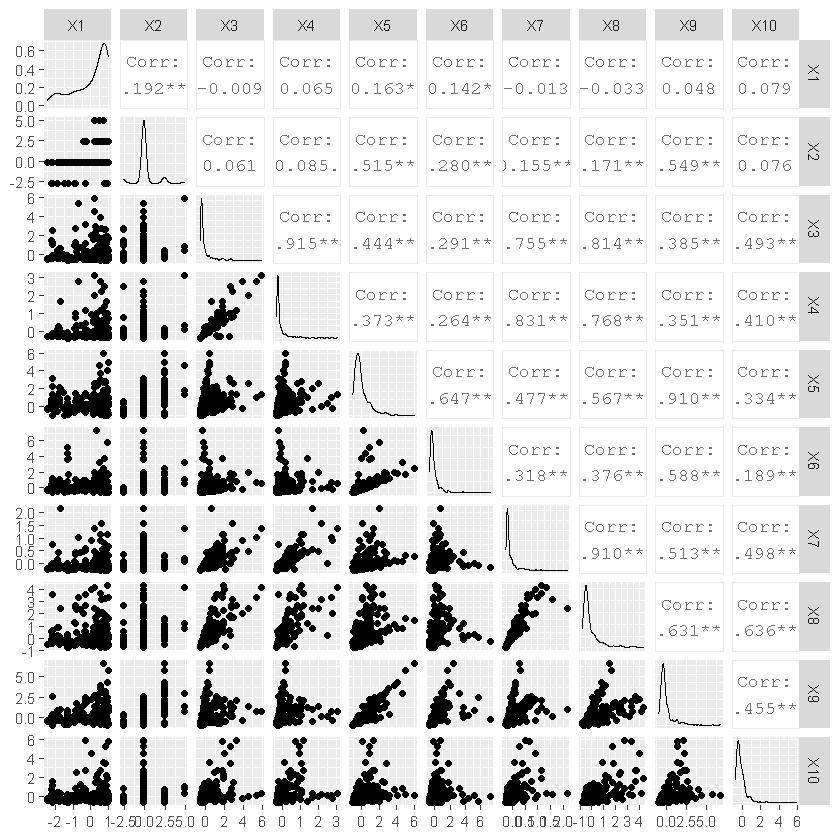

In [179]:
ggpairs(data.frame(X_num))
car::vif(model3)      
#Some of the VIFs are greater than 10 so we will look into Lasso

In [181]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.0-2


(Intercept)     Page.total.likes                 Type 
          6.56120285           0.00000000           0.01432706 
         Total.Reach    Total.Impressions            Consumers 
          0.00000000           0.04198231           0.53507628 
        Consumptions    Impressions.liked          Reach.liked 
          0.00000000           0.00000000           0.00000000 
People.engaged.liked   Total.Interactions           Category_2 
          0.00000000           0.20084145           0.00000000 
          Category_3    Post.Month_group2    Post.Month_group3 
          0.00000000           0.00000000          -0.16864668 
Post.Weekday_weekend    Post.Hour_morning        Post.Hour_day 
          0.00000000           0.00000000           0.00000000 
   Post.Hour_evening               Paid_1 
          0.00000000           0.00000000

[1] 6

[1] "(Intercept)"        "Type"               "Total.Impressions" 
[4] "Consumers"          "Total.Interactions" "Post.Month_group3"

[1] 0.007430263

MAPE 0.0561322

Type  Total.Impressions          Consumers Total.Interactions 
          1.476992           1.316422           1.821483           1.284716 
 Post.Month_group3 
          1.096464

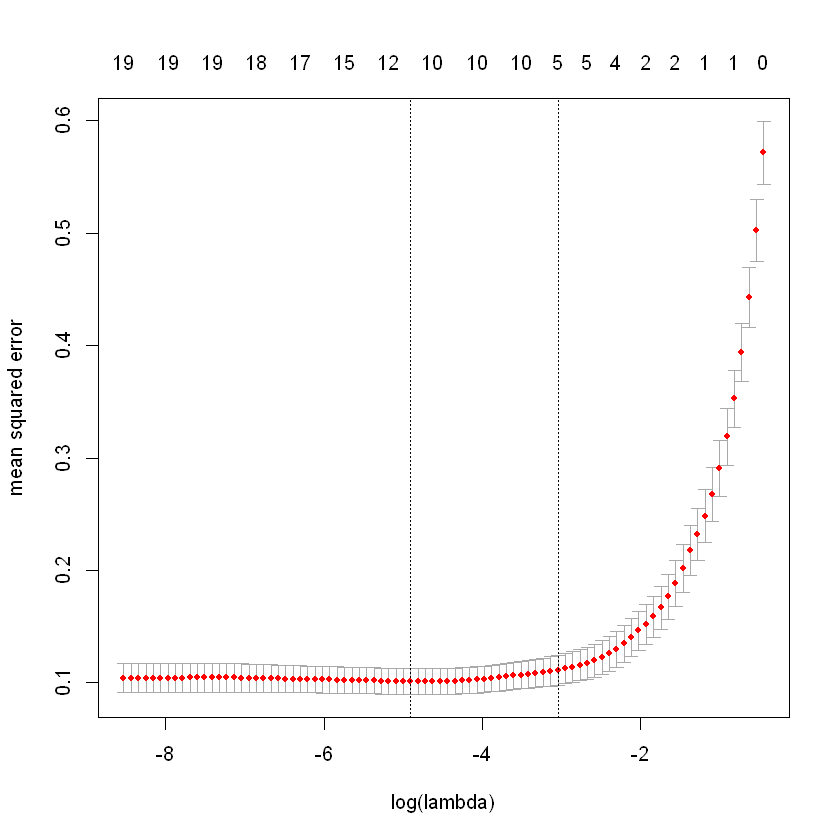

In [183]:
#Lasso to remove multicolinearity + variable selection
xtrain=as.matrix(my_data2[,-1])
ytrain=as.vector(my_data2[,1])
cv.out=cv.glmnet(xtrain,ytrain,type.measure = "mse",alpha=1, family="gaussian")
a=coef(cv.out)[,1]
a
length(a[a!=0]) #17 non zero coefficients
selected_variable=names(a[a!=0])
selected_variable
plot(cv.out,xlab="log(lambda)",ylab="mean squared error")
bestlam=cv.out$lambda.min
bestlam
lasso.pred=predict(cv.out,s=bestlam,newx = as.matrix(X_test))
MAPE(lasso.pred,log(y_test)) #0.0563

lasso_model=lm(formula=z~Type+Total.Impressions+Consumers+Total.Interactions+Post.Month_group3,data=my_data2)
car::vif(lasso_model)
#All VIFs are less than 10 so this indicates multicollinearity has been 
#removed and Variable selection has been applied

In [184]:
bestlam


[1] 0.007430263